# CIFAR-10 Image Classification
## ECS7026P - Neural Networks and Deep Learning

#### **Student ID Number:** 230841125
#### **Name:** Sunantha Kannan

In [ ]:
# Import PyTorch
import torch
from torch import nn


# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2
torchvision version: 0.16.2


# 1. Getting Datasets









The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

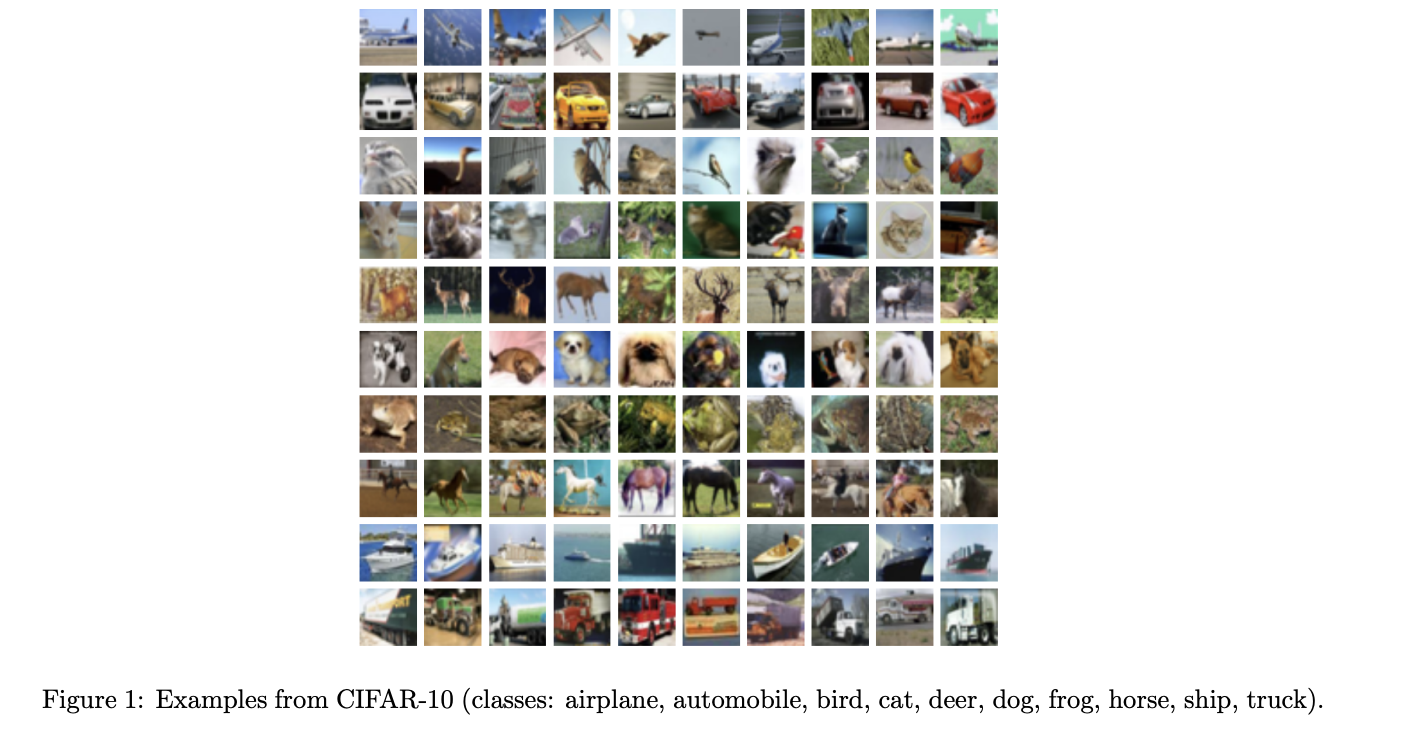

In [ ]:
# HYPER PARAMETERS
BATCH_SIZE = 64
IMAGE_SIZE = 32


**Converting Data sets into tensors for image processing and feature Engineering in Basic CNN model**

In [ ]:
# training data
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# testing data
test_data = datasets.CIFAR10(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


**NOTE:**


   **After Encountering the accuracy is bad in basic CNN model, I have performed the transformations on input test and train data and passed it to  adavanced CNN model to get better results in the accuarcy.**



**Training Transformations:**
- **RandomHorizontalFlip**: Augments by mirroring images, enhancing model generalization.
- **RandomCrop**: Introduces variability with random crops, mitigates overfitting.
- **ToTensor**: Converts images to PyTorch tensors, scaling pixel values to [0, 1].
- **Normalize**: Standardizes pixel values to the range [-1, 1], stabilizing training dynamics.

**Test Transformations:**
- Consistent with training but excludes random augmentations to maintain test condition integrity.

**Purpose:**
These transformations prepare images for training by promoting model good and ensuring consistent data processing across training and testing phases, important for  model performance.

In [ ]:
# Data transformations for the train and test sets
train_transformations = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(IMAGE_SIZE, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)
test_transformations = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
# training data
train_transformed_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=train_transformations,
    target_transform=None
)

# testing data
test_transformed_data = datasets.CIFAR10(
    root="data",
    train=False, # get test data
    download=True,
    transform=test_transformations
)

Files already downloaded and verified
Files already downloaded and verified


### 1.1 Input and output shapes of a Image

In [ ]:
# first training sample
image, label = train_data[0]

# Shape of the Image
image.shape

torch.Size([3, 32, 32])

The shape of the image tensor is [3, 32, 32]




```
[color_channels=3, height=32, width=32]
```




Having color_channels=3 means the image is RGB.

In [ ]:
# Number of samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(50000, 50000, 10000, 10000)

we've got 50,000 training samples and 10,000 testing samples.



In [ ]:
# Number of classes
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 1.2 Visualizing our data

Image shape: torch.Size([3, 32, 32])
Image label: 6, Label name: frog


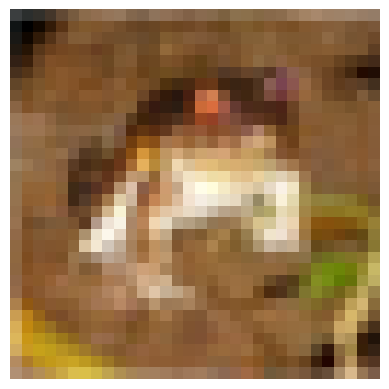

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image, label = train_data[0]

# Map numeric labels to class names (CIFAR-10 specific)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Image shape: {image.shape}")

# Print label name using the label as an index
print(f"Image label: {label}, Label name: {classes[label]}")


img = image.numpy()  # Convert tensor to numpy array
img = np.transpose(img, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
plt.imshow(img)
plt.axis('off')
plt.show()




# 2. Dataloader

DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

**`Without Transforming data passing it into data loader for Basic CNN Model`**

In [ ]:
from torch.utils.data import DataLoader

# Turning datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Printing results of Data Loader
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2a1b0e8390>, <torch.utils.data.dataloader.DataLoader object at 0x7f2a1af0c910>)
Length of train dataloader: 782 batches of 64
Length of test dataloader: 157 batches of 64


**`Transformed test and train data passing it into data loader for advanced CNN model.`**

In [ ]:
from torch.utils.data import DataLoader

# Passing Transformed dataset for iterables
train_transformed_dataloader = DataLoader(train_transformed_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_transformed_dataloader = DataLoader(test_transformed_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Printing results of Transformed input in  Data Loader
print(f"Transformed Input Dataloaders: {train_transformed_dataloader, test_transformed_dataloader}")
print(f"Length of Transformed train dataloader: {len(train_transformed_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of Transformed test dataloader: {len(test_transformed_dataloader)} batches of {BATCH_SIZE}")

Transformed Input Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2a1b1b2790>, <torch.utils.data.dataloader.DataLoader object at 0x7f2a1adc0d50>)
Length of Transformed train dataloader: 782 batches of 64
Length of Transformed test dataloader: 157 batches of 64


In [ ]:
# training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

# 3. Setup device agnostic-code

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **4. BASELINE MODEL**

The architecture is composed of a sequence of intermediate blocks B1, B2, . . . , BK that are followed by an output block O


**Neural Network Architecture:**

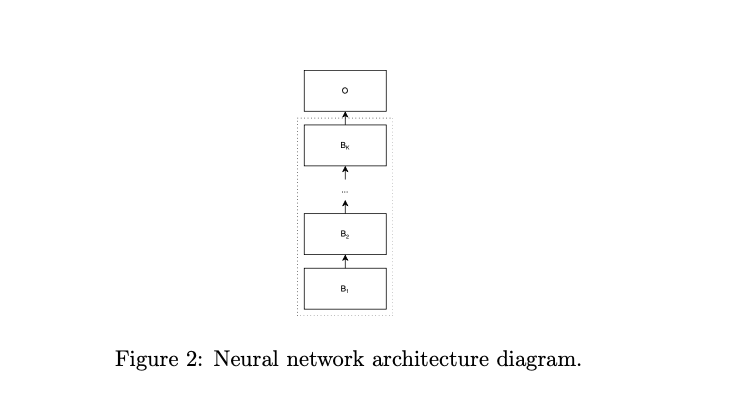

The BasicArchModel includes initial processing with less feature extraction , weight summation and then computing output block with full connected layers

In [ ]:
class BasicIntermediateBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_layers, kernel_size=3):

        super(BasicIntermediateBlock, self).__init__()
        # Create a list of convolutional layers
        self.conv_layers = nn.ModuleList([])

        for _ in range(num_layers):
            self.conv_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size),
                nn.BatchNorm2d(out_channels),
                nn.ReLU()
            ))
        self.fc = nn.Linear(in_channels, num_layers)

    def forward(self, x):

        # Computing mean separately for each color channel
        mean_values  = x.mean([2, 3])

        # Calculating layerweights using a fully connected layer
        layer_weights = torch.softmax(self.fc(mean_values), dim=1)

        # Sum of weights
        weighted_sum = sum(layer_weights[:, i].view(-1, 1, 1, 1) * conv(x) for i, conv in enumerate(self.conv_layers))


        return weighted_sum

class BasicOutputBlock(nn.Module):
    def __init__(self, in_channels, num_classes, num_fc_layers=1, activation=nn.ReLU()):

        super(BasicOutputBlock, self).__init__()

        self.fc_layers = nn.ModuleList([nn.Linear(in_channels, in_channels) for _ in range(num_fc_layers - 1)])

        # Final layer to num_classes
        self.fc_layers.append(nn.Linear(in_channels, num_classes))

        # Relu Activation function
        self.activation = activation

    def forward(self, x):

        # Compute mean separately for each color channel
        mean_values = x.mean([2, 3])
        # Process the mean inputs through the intermediate fully connected layers
        for fc in self.fc_layers[:-1]:
            mean_values = self.activation(fc(mean_values))
        output = self.fc_layers[-1](mean_values)

        return output


class BasicArchModel(nn.Module):
    def __init__(self, input_channels, hidden_units, output_shape, num_blocks, num_conv_layers):

        super(BasicArchModel, self).__init__()

        # Number of Blocks
        self.num_blocks = num_blocks

        # First intermediate block with input_channels to hidden_units
        self.first_conv_block= BasicIntermediateBlock(input_channels, hidden_units, num_conv_layers)

        # Additional intermediate blocks
        self.intermediate_blocks = nn.ModuleList([
            BasicIntermediateBlock(hidden_units, hidden_units, num_conv_layers) for _ in range(num_blocks - 1)
        ])
        # Output block
        self.output_block = BasicOutputBlock(hidden_units, output_shape)

    def forward(self, x):

        # Initial Block
        x = self.first_conv_block(x)

        # Number Intermediate bLOCKS
        for block in self.intermediate_blocks:
            x = block(x)
        x = self.output_block(x)

        return x


# **5. ADVANCED MODEL**



In this advanced model , to improve accuracy and also to get best model for the multiclass image problem. when compared to baseline model , we have included adaptive pooling and used better

In [ ]:
#Hyper Parameters
CONV_KERNEL_SIZE = 3
CONV_PADDING = 1
CONV_STRIDE =1

MAX_POOL_KERNEL_SIZE = 2
MAX_POOL_STRIDE = 2

DROP_RATE = 0.2

### 5.1 Intermediate Block:

The IntermediateBlock class is a component in a neural network that processes images through several steps to help the model learn useful features:
     
     1.Adaptive Average Pooling
     2.Convolution Layers:
          * Convolution
          * Batch Normalization
          * LeakyReLU
          * Max Pooling
          * Dropout
    3.Fully Connected Layer

The `IntermediateBlock` processes images by first simplifying them into a summary form and then extracting important patterns using a series of filters.

These filters help identify basic visual elements such as edges and textures. The block reduces data complexity with pooling, stabilizes the learning with normalization, and prevents the model from memorizing irrelevant details using dropout. A droput is regularization technique that helps to prevent overfitting



Finally, it combines all the extracted features in a meaningful way based on learned importance, producing a compact representation that the model uses for making predictions or further processing.





In [ ]:
class IntermediateBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_layers, kernel_size=CONV_KERNEL_SIZE, dropout_rate=DROP_RATE):
        super(IntermediateBlock, self).__init__()
        self.adaptive_avg_pool = nn.AdaptiveAvgPool2d(1)

        # Create a list of convolutional layers
        self.conv_layers = nn.ModuleList([])

        for _ in range(num_layers):
            self.conv_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=CONV_PADDING, stride=CONV_STRIDE),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(),
                nn.MaxPool2d(
                        kernel_size=MAX_POOL_KERNEL_SIZE, stride=MAX_POOL_STRIDE
                    ),
                nn.Dropout(dropout_rate)
            ))
        self.fc = nn.Linear(in_channels, num_layers)



    def forward(self, x):

        # Applying adaptive average pooling to the input to reduce each feature map to a single value.
        pooled_features  = self.adaptive_avg_pool(x).view(x.size(0), -1)

        # Passing the pooled features through a fully connected layer and then apply softmax.
        weights = torch.softmax(self.fc(pooled_features ), dim=1)

        # Sum of these weighted outputs
        combined_features = sum(weights[:, i].view(-1, 1, 1, 1) * conv(x) for i, conv in enumerate(self.conv_layers))

        return combined_features



### 5.2 Output Block:

The `OutputBlock` is a part of a neural network that processes images for classification. It simplifies the output from previous layers by averaging their details into single values and then uses a series of steps to prepare for making a final decision:

1. **Global Average Pooling**: Reduces complex information from each filter output into a single average value. This focuses on what features are present rather than where they are.

2. **Fully Connected Layers**: These layers take the simplified inputs and sequentially refine them to classify the image. The last layer outputs the probabilities for each class.

3. **Activation Functions**: Used between layers to help the model account for nonlinear relationships in the data.

The block acts as a bridge, turning detailed feature data into final class predictions by summarizing, refining, and interpreting the features extracted by earlier network stages. This setup is typically used at the end of networks designed to categorize images.

In [ ]:
class OutputBlock(nn.Module):
    def __init__(self, in_channels, num_classes, num_fc_layers=4, activation=nn.LeakyReLU()):

        super(OutputBlock, self).__init__()

        # Initializing a module list for holding the fully connected layers.
        self.fc_layers = nn.ModuleList([nn.Linear(in_channels, in_channels) for _ in range(num_fc_layers - 1)])

        # Final layer to num_classes
        self.fc_layers.append(nn.Linear(in_channels, num_classes))

        # LeakyRelu Activation function is used between fully connected layers
        self.activation = activation

    def forward(self, x):
        #mean pooling
        mean = x.mean([2, 3])  # Compute mean separately for each color channel

        # Process the mean inputs through the intermediate fully connected layers
        for fc in self.fc_layers[:-1]:
            mean = self.activation(fc(mean))

        # final output from the last fully connected layer
        final_output_layer = self.fc_layers[-1](mean)

        return final_output_layer



### 5.3 Advanced Architecture Model Class:

This AdvancedArchModel class is structured to sequentially process input data through multiple feature extraction blocks, each composed of several layers designed to refine and transform input features. It starts with an initial feature extraction block, continues through several intermediate blocks for additional feature processing, and concludes with a classifier block that maps the final feature representations to class scores. This setup is typically used in image classification tasks where complex patterns need to be learned from raw image data

In [ ]:
class AdvancedArchModel(nn.Module):
    def __init__(self, input_channels, hidden_units, output_shape, num_blocks, num_conv_layers):

        super(AdvancedArchModel, self).__init__()

        # Number of blocks
        self.num_blocks = num_blocks

        # First intermediate block with input_channels to hidden_units
        self.conv_block_initial = IntermediateBlock(input_channels, hidden_units, num_conv_layers)

        # Additional intermediate blocks for further feature extraction
        self.intermediate_blocks = nn.ModuleList([
            IntermediateBlock(hidden_units, hidden_units, num_conv_layers) for _ in range(num_blocks - 1)
        ])

        # Output block
        self.output_block = OutputBlock(hidden_units, output_shape)

    def forward(self, x):

        features = self.conv_block_initial(x)

        for block in self.intermediate_blocks:
            features = block(features)
        features = self.output_block(features)

        return features

# **6. BASIC/ADVANCED Model Hyperparameters and Instantiation**

###6.1 HYPER PARAMETERS FOR MODEL:
        
  we can adjust our parameters to the model to get best accuracy

In [ ]:
# CIFAR-10 images are RGB, so input has  3 channels
INPUT_CHANNELS = 3

# adjust based on requirements
HIDDEN_UNITS = 512

# The output of CIFAR-10 has 10 classes
OUTPUT_SHAPE = 10

# Number of intermediate blocks to describe in network
NUM_BLOCKS = 4

# Number of convolutional layers per intermediate block
NUM_CONV_LAYERS = 4

### 6.2 BASIC CNN MODEL INSTANTIATION

In [ ]:
# Model Instantiation for Baseline model
basic_model = BasicArchModel(
                input_channels=INPUT_CHANNELS,
                hidden_units=HIDDEN_UNITS,
                output_shape=OUTPUT_SHAPE,
                num_blocks=NUM_BLOCKS,
                num_conv_layers=NUM_CONV_LAYERS).to(device)

# View model Architecture
print(basic_model)

BasicArchModel(
  (first_conv_block): BasicIntermediateBlock(
    (conv_layers): ModuleList(
      (0-3): 4 x Sequential(
        (0): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (fc): Linear(in_features=3, out_features=4, bias=True)
  )
  (intermediate_blocks): ModuleList(
    (0-2): 3 x BasicIntermediateBlock(
      (conv_layers): ModuleList(
        (0-3): 4 x Sequential(
          (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
          (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
        )
      )
      (fc): Linear(in_features=512, out_features=4, bias=True)
    )
  )
  (output_block): BasicOutputBlock(
    (fc_layers): ModuleList(
      (0): Linear(in_features=512, out_features=10, bias=True)
    )
    (activation): ReLU()
  )
)


### 6.3 ADVANCED CNN MODEL INSTANTIATION

In [ ]:
# Model Instantiation for advanced CNN model
adv_model = AdvancedArchModel(
                input_channels=INPUT_CHANNELS,
                hidden_units=HIDDEN_UNITS,
                output_shape=OUTPUT_SHAPE,
                num_blocks=NUM_BLOCKS,
                num_conv_layers=NUM_CONV_LAYERS).to(device)

# View model Architecture
print(adv_model)

AdvancedArchModel(
  (conv_block_initial): IntermediateBlock(
    (adaptive_avg_pool): AdaptiveAvgPool2d(output_size=1)
    (conv_layers): ModuleList(
      (0-3): 4 x Sequential(
        (0): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (4): Dropout(p=0.2, inplace=False)
      )
    )
    (fc): Linear(in_features=3, out_features=4, bias=True)
  )
  (intermediate_blocks): ModuleList(
    (0-2): 3 x IntermediateBlock(
      (adaptive_avg_pool): AdaptiveAvgPool2d(output_size=1)
      (conv_layers): ModuleList(
        (0-3): 4 x Sequential(
          (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyR

# 7. Create the Loss and Optimizer

### 7.1 Cross Entropy Loss

Cross-entropy, also known as logarithmic loss or log loss and it measures the difference between the discovered probability distribution of a classification model and the predicted values.

Reference: https://www.datacamp.com/tutorial/the-cross-entropy-loss-function-in-machine-learning


In [ ]:
loss_function = nn.CrossEntropyLoss()

loss_function

CrossEntropyLoss()

### 7.2 AdamW Optimizer

Tried other optimizers SGD, Adam but AdamW optimizer works well for this multiclass classification problem becausethe parameters are updated by the parameters from the previous iteration weighted by the weight decay. It helps to prevent overfitting by forcing the model to have smaller weight.

Reference: https://towardsdatascience.com/why-adamw-matters-736223f31b5d

In [ ]:
# HYPERPARAMETER
ADAMW_LEARNING_RATE = 0.001
ADAMW_WEIGHT_DECAY = 1e-2

# Optimizer for basic CNN
basic_adamw_optimizer = torch.optim.AdamW(
    params=basic_model.parameters(), lr=ADAMW_LEARNING_RATE, weight_decay=ADAMW_WEIGHT_DECAY
)

print("Adamw optimizer defined for basic CNN")
basic_adamw_optimizer

Adamw optimizer defined for basic CNN


AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [ ]:
# Optimizer for advanced CNN
adv_adamw_optimizer = torch.optim.AdamW(
    params=adv_model.parameters(), lr=ADAMW_LEARNING_RATE, weight_decay=ADAMW_WEIGHT_DECAY
)

print("Adamw optimizer defined for advanced CNN")
adv_adamw_optimizer

Adamw optimizer defined for advanced CNN


AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

# 6. Functions to Train and Test the Model


**accuracy_fn Function:**

Calculates how many predictions the model got right and expresses this as a percentage of the total predictions.

**train_step Function:**

Trains the model over one full pass of the training data (an epoch), using batches.

For each batch, it updates the model's weights to minimize errors in predictions.

At the end of the epoch, it reports the average error and accuracy across all training batches.

**test_step Function:**

Evaluates the model's performance on a separate dataset not used during training to ensure the model can generalize well to new data.

It computes and reports the error and accuracy across all test batches.


In [ ]:
# Calculates the accuracy of predictions made by the model
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):
    model.to(device)  # Move model to the appropriate device just once
    model.train()  # Set the model to training mode
    train_loss, train_acc = 0, 0

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)  # Send data to GPU/CPU

        # Forward pass
        y_pred = model(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Use .item() to convert loss to a Python number
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Zero the gradients before running the backward pass
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Calculating average loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc

def test_step(data_loader,
              model,
              loss_fn,
              accuracy_fn,
              device):
    model.to(device)  # model is on the right device
    model.eval()  # Set the model to evaluation mode
    test_loss, test_acc = 0, 0

    with torch.inference_mode():  # inference mode
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)

            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y).item()  # Detach and convert loss
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculate average loss and accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
    return test_loss, test_acc

### **6.1 Training and Testing Loop for Basic and Advanced Neural Network**

**`Looping Train and test batches for Basic CNN`**

The Data has been trained for 30 epochs and monitored the accuracy and loss values

In [ ]:
from tqdm import tqdm

torch.manual_seed(42)

#HYPERPARAMETER
EPOCHS = 30


basic_train_losses = []
basic_train_accuracies = []
basic_test_losses = []
basic_test_accuracies = []

for epoch in tqdm(range(EPOCHS), desc="Epochs"):
    print(f"Epoch: {epoch + 1}\n---------")

    train_loss, train_acc = train_step(
               data_loader=train_dataloader,
               model=basic_model,
               loss_fn=loss_function,
               optimizer=basic_adamw_optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_loss, test_acc = test_step(
              data_loader=test_dataloader,
              model=basic_model,
              loss_fn=loss_function,
              accuracy_fn=accuracy_fn,
              device=device)

    # Storing metrics to lists for later plotting
    basic_train_losses .append(train_loss)
    basic_train_accuracies.append(train_acc)
    basic_test_losses.append(test_loss)
    basic_test_accuracies.append(test_acc)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
---------


/opt/conda/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Train loss: 1.42677 | Train accuracy: 47.49%


Epochs:   3%|▎         | 1/30 [07:45<3:45:04, 465.66s/it]

Test loss: 2.07419 | Test accuracy: 36.45%

Epoch: 2
---------
Train loss: 1.06690 | Train accuracy: 62.16%


Epochs:   7%|▋         | 2/30 [16:16<3:49:34, 491.96s/it]

Test loss: 1.42498 | Test accuracy: 52.30%

Epoch: 3
---------
Train loss: 0.91357 | Train accuracy: 67.56%


Epochs:  10%|█         | 3/30 [24:07<3:37:07, 482.50s/it]

Test loss: 1.19977 | Test accuracy: 59.40%

Epoch: 4
---------
Train loss: 0.81220 | Train accuracy: 71.32%


Epochs:  13%|█▎        | 4/30 [32:06<3:28:33, 481.30s/it]

Test loss: 1.24141 | Test accuracy: 59.38%

Epoch: 5
---------
Train loss: 0.73113 | Train accuracy: 74.44%


Epochs:  17%|█▋        | 5/30 [39:51<3:18:00, 475.21s/it]

Test loss: 1.84129 | Test accuracy: 50.60%

Epoch: 6
---------
Train loss: 0.65875 | Train accuracy: 76.61%


Epochs:  20%|██        | 6/30 [47:23<3:06:58, 467.43s/it]

Test loss: 1.20481 | Test accuracy: 60.97%

Epoch: 7
---------
Train loss: 0.60422 | Train accuracy: 78.90%


Epochs:  23%|██▎       | 7/30 [54:22<2:53:06, 451.58s/it]

Test loss: 1.05392 | Test accuracy: 64.70%

Epoch: 8
---------
Train loss: 0.53782 | Train accuracy: 81.25%


Epochs:  27%|██▋       | 8/30 [1:01:53<2:45:32, 451.49s/it]

Test loss: 0.79243 | Test accuracy: 73.94%

Epoch: 9
---------
Train loss: 0.49367 | Train accuracy: 82.63%


Epochs:  30%|███       | 9/30 [1:08:46<2:33:44, 439.28s/it]

Test loss: 0.91955 | Test accuracy: 70.12%

Epoch: 10
---------
Train loss: 0.44948 | Train accuracy: 84.52%


Epochs:  33%|███▎      | 10/30 [1:15:46<2:24:30, 433.51s/it]

Test loss: 0.79546 | Test accuracy: 73.14%

Epoch: 11
---------
Train loss: 0.40970 | Train accuracy: 85.69%


Epochs:  37%|███▋      | 11/30 [1:23:04<2:17:43, 434.91s/it]

Test loss: 0.87168 | Test accuracy: 72.44%

Epoch: 12
---------
Train loss: 0.36631 | Train accuracy: 87.13%


Epochs:  40%|████      | 12/30 [1:29:11<2:04:16, 414.25s/it]

Test loss: 0.79509 | Test accuracy: 74.47%

Epoch: 13
---------
Train loss: 0.33400 | Train accuracy: 88.31%


Epochs:  43%|████▎     | 13/30 [1:35:37<1:54:53, 405.50s/it]

Test loss: 0.96953 | Test accuracy: 71.82%

Epoch: 14
---------
Train loss: 0.29587 | Train accuracy: 89.64%


Epochs:  47%|████▋     | 14/30 [1:42:18<1:47:45, 404.10s/it]

Test loss: 0.80715 | Test accuracy: 74.76%

Epoch: 15
---------
Train loss: 0.26466 | Train accuracy: 90.79%


Epochs:  50%|█████     | 15/30 [1:49:48<1:44:32, 418.15s/it]

Test loss: 1.34983 | Test accuracy: 62.74%

Epoch: 16
---------
Train loss: 0.23850 | Train accuracy: 91.79%


Epochs:  53%|█████▎    | 16/30 [1:55:36<1:32:37, 396.97s/it]

Test loss: 0.67826 | Test accuracy: 78.75%

Epoch: 17
---------
Train loss: 0.21110 | Train accuracy: 92.60%


Epochs:  57%|█████▋    | 17/30 [2:01:04<1:21:32, 376.32s/it]

Test loss: 0.77292 | Test accuracy: 76.64%

Epoch: 18
---------
Train loss: 0.19346 | Train accuracy: 93.33%


Epochs:  60%|██████    | 18/30 [2:07:28<1:15:42, 378.53s/it]

Test loss: 0.78560 | Test accuracy: 76.14%

Epoch: 19
---------
Train loss: 0.16375 | Train accuracy: 94.34%


Epochs:  63%|██████▎   | 19/30 [2:13:17<1:07:45, 369.56s/it]

Test loss: 0.68663 | Test accuracy: 79.67%

Epoch: 20
---------
Train loss: 0.15182 | Train accuracy: 94.81%


Epochs:  67%|██████▋   | 20/30 [2:18:15<58:01, 348.12s/it]  

Test loss: 0.80691 | Test accuracy: 77.78%

Epoch: 21
---------
Train loss: 0.13301 | Train accuracy: 95.51%


Epochs:  70%|███████   | 21/30 [2:20:58<43:52, 292.51s/it]

Test loss: 0.81528 | Test accuracy: 76.39%

Epoch: 22
---------
Train loss: 0.12214 | Train accuracy: 95.80%


Epochs:  73%|███████▎  | 22/30 [2:23:39<33:45, 253.17s/it]

Test loss: 0.89163 | Test accuracy: 76.87%

Epoch: 23
---------
Train loss: 0.11149 | Train accuracy: 96.11%


Epochs:  77%|███████▋  | 23/30 [2:26:06<25:48, 221.19s/it]

Test loss: 0.76835 | Test accuracy: 79.61%

Epoch: 24
---------
Train loss: 0.09692 | Train accuracy: 96.67%


Epochs:  80%|████████  | 24/30 [2:28:46<20:18, 203.01s/it]

Test loss: 0.94045 | Test accuracy: 75.60%

Epoch: 25
---------
Train loss: 0.08826 | Train accuracy: 97.04%


Epochs:  83%|████████▎ | 25/30 [2:30:51<14:58, 179.61s/it]

Test loss: 0.83139 | Test accuracy: 79.32%

Epoch: 26
---------
Train loss: 0.08615 | Train accuracy: 97.07%


Epochs:  87%|████████▋ | 26/30 [2:32:46<10:40, 160.00s/it]

Test loss: 1.00153 | Test accuracy: 76.33%

Epoch: 27
---------
Train loss: 0.07701 | Train accuracy: 97.37%


Epochs:  90%|█████████ | 27/30 [2:34:30<07:09, 143.26s/it]

Test loss: 0.73241 | Test accuracy: 80.81%

Epoch: 28
---------
Train loss: 0.07637 | Train accuracy: 97.48%


Epochs:  93%|█████████▎| 28/30 [2:36:14<04:23, 131.53s/it]

Test loss: 0.95227 | Test accuracy: 77.12%

Epoch: 29
---------
Train loss: 0.06339 | Train accuracy: 97.97%


Epochs:  97%|█████████▋| 29/30 [2:37:58<02:03, 123.30s/it]

Test loss: 0.82534 | Test accuracy: 80.87%

Epoch: 30
---------
Train loss: 0.06993 | Train accuracy: 97.61%


Epochs: 100%|██████████| 30/30 [2:39:42<00:00, 319.43s/it]

Test loss: 0.86018 | Test accuracy: 79.61%



**`Looping Train and test batches for Advanced CNN`**

The Data has been trained for 50 epochs and monitored the accuracy and loss values in the advanced CNN model

In [ ]:
from tqdm import tqdm

torch.manual_seed(42)

#HYPERPARAMETER
EPOCHS = 50

adv_train_losses = []
adv_train_accuracies = []
adv_test_losses = []
adv_test_accuracies = []

for epoch in tqdm(range(EPOCHS), desc="Epochs"):
    print(f"Epoch: {epoch + 1}\n---------")

    train_loss, train_acc = train_step(
               data_loader=train_transformed_dataloader,
               model=adv_model,
               loss_fn=loss_function,
               optimizer=adv_adamw_optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_loss, test_acc = test_step(
              data_loader=test_transformed_dataloader,
              model=adv_model,
              loss_fn=loss_function,
              accuracy_fn=accuracy_fn,
              device=device)

    # Storing metrics to lists for later plotting
    adv_train_losses .append(train_loss)
    adv_train_accuracies.append(train_acc)
    adv_test_losses.append(test_loss)
    adv_test_accuracies.append(test_acc)


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1
---------
Train loss: 1.55228 | Train accuracy: 40.06%


Epochs:   2%|▏         | 1/50 [02:55<2:23:37, 175.87s/it]

Test loss: 1.37172 | Test accuracy: 50.51%

Epoch: 2
---------
Train loss: 1.15600 | Train accuracy: 58.20%


Epochs:   4%|▍         | 2/50 [05:50<2:19:56, 174.93s/it]

Test loss: 1.10982 | Test accuracy: 61.43%

Epoch: 3
---------
Train loss: 0.95258 | Train accuracy: 65.96%


Epochs:   6%|▌         | 3/50 [08:44<2:16:51, 174.71s/it]

Test loss: 0.86137 | Test accuracy: 69.80%

Epoch: 4
---------
Train loss: 0.84105 | Train accuracy: 70.32%


Epochs:   8%|▊         | 4/50 [11:40<2:14:23, 175.30s/it]

Test loss: 1.05912 | Test accuracy: 65.27%

Epoch: 5
---------
Train loss: 0.75252 | Train accuracy: 73.72%


Epochs:  10%|█         | 5/50 [14:35<2:11:19, 175.10s/it]

Test loss: 0.77045 | Test accuracy: 73.30%

Epoch: 6
---------
Train loss: 0.69009 | Train accuracy: 75.95%


Epochs:  12%|█▏        | 6/50 [17:30<2:08:16, 174.92s/it]

Test loss: 0.69043 | Test accuracy: 76.16%

Epoch: 7
---------
Train loss: 0.63885 | Train accuracy: 77.84%


Epochs:  14%|█▍        | 7/50 [20:24<2:05:13, 174.73s/it]

Test loss: 0.60837 | Test accuracy: 79.09%

Epoch: 8
---------
Train loss: 0.59141 | Train accuracy: 79.48%


Epochs:  16%|█▌        | 8/50 [23:18<2:02:14, 174.64s/it]

Test loss: 0.60816 | Test accuracy: 79.03%

Epoch: 9
---------
Train loss: 0.55729 | Train accuracy: 80.87%


Epochs:  18%|█▊        | 9/50 [26:13<1:59:18, 174.61s/it]

Test loss: 0.56703 | Test accuracy: 81.01%

Epoch: 10
---------
Train loss: 0.52682 | Train accuracy: 81.78%


Epochs:  20%|██        | 10/50 [29:07<1:56:20, 174.52s/it]

Test loss: 0.55400 | Test accuracy: 81.37%

Epoch: 11
---------
Train loss: 0.49330 | Train accuracy: 82.90%


Epochs:  22%|██▏       | 11/50 [32:03<1:53:42, 174.93s/it]

Test loss: 0.51012 | Test accuracy: 83.39%

Epoch: 12
---------
Train loss: 0.46960 | Train accuracy: 83.85%


Epochs:  24%|██▍       | 12/50 [34:58<1:50:45, 174.88s/it]

Test loss: 0.55161 | Test accuracy: 82.25%

Epoch: 13
---------
Train loss: 0.44335 | Train accuracy: 84.75%


Epochs:  26%|██▌       | 13/50 [37:52<1:47:45, 174.75s/it]

Test loss: 0.47722 | Test accuracy: 84.18%

Epoch: 14
---------
Train loss: 0.42116 | Train accuracy: 85.57%


Epochs:  28%|██▊       | 14/50 [40:47<1:44:46, 174.62s/it]

Test loss: 0.47042 | Test accuracy: 84.44%

Epoch: 15
---------
Train loss: 0.40077 | Train accuracy: 86.23%


Epochs:  30%|███       | 15/50 [43:41<1:41:47, 174.51s/it]

Test loss: 0.44278 | Test accuracy: 85.52%

Epoch: 16
---------
Train loss: 0.37887 | Train accuracy: 87.01%


Epochs:  32%|███▏      | 16/50 [46:35<1:38:52, 174.49s/it]

Test loss: 0.42683 | Test accuracy: 85.84%

Epoch: 17
---------
Train loss: 0.35871 | Train accuracy: 87.59%


Epochs:  34%|███▍      | 17/50 [49:30<1:35:57, 174.46s/it]

Test loss: 0.44018 | Test accuracy: 85.62%

Epoch: 18
---------
Train loss: 0.34397 | Train accuracy: 88.21%


Epochs:  36%|███▌      | 18/50 [52:24<1:33:03, 174.49s/it]

Test loss: 0.40153 | Test accuracy: 87.23%

Epoch: 19
---------
Train loss: 0.33516 | Train accuracy: 88.48%


Epochs:  38%|███▊      | 19/50 [55:19<1:30:10, 174.54s/it]

Test loss: 0.43899 | Test accuracy: 85.97%

Epoch: 20
---------
Train loss: 0.31455 | Train accuracy: 89.36%


Epochs:  40%|████      | 20/50 [58:13<1:27:13, 174.47s/it]

Test loss: 0.43817 | Test accuracy: 86.11%

Epoch: 21
---------
Train loss: 0.30293 | Train accuracy: 89.49%


Epochs:  42%|████▏     | 21/50 [1:01:07<1:24:12, 174.24s/it]

Test loss: 0.44558 | Test accuracy: 87.25%

Epoch: 22
---------
Train loss: 0.28995 | Train accuracy: 90.07%


Epochs:  44%|████▍     | 22/50 [1:04:00<1:21:11, 174.00s/it]

Test loss: 0.39458 | Test accuracy: 87.81%

Epoch: 23
---------
Train loss: 0.27701 | Train accuracy: 90.32%


Epochs:  46%|████▌     | 23/50 [1:06:54<1:18:12, 173.79s/it]

Test loss: 0.39441 | Test accuracy: 87.71%

Epoch: 24
---------
Train loss: 0.26751 | Train accuracy: 90.79%


Epochs:  48%|████▊     | 24/50 [1:09:47<1:15:14, 173.65s/it]

Test loss: 0.41218 | Test accuracy: 87.21%

Epoch: 25
---------
Train loss: 0.25915 | Train accuracy: 91.09%


Epochs:  50%|█████     | 25/50 [1:12:40<1:12:18, 173.53s/it]

Test loss: 0.37954 | Test accuracy: 88.31%

Epoch: 26
---------
Train loss: 0.24548 | Train accuracy: 91.39%


Epochs:  52%|█████▏    | 26/50 [1:15:34<1:09:23, 173.49s/it]

Test loss: 0.45548 | Test accuracy: 86.41%

Epoch: 27
---------
Train loss: 0.24442 | Train accuracy: 91.54%


Epochs:  54%|█████▍    | 27/50 [1:18:27<1:06:30, 173.48s/it]

Test loss: 0.36691 | Test accuracy: 88.61%

Epoch: 28
---------
Train loss: 0.23549 | Train accuracy: 91.83%


Epochs:  56%|█████▌    | 28/50 [1:21:21<1:03:37, 173.53s/it]

Test loss: 0.38634 | Test accuracy: 88.51%

Epoch: 29
---------
Train loss: 0.22852 | Train accuracy: 92.17%


Epochs:  58%|█████▊    | 29/50 [1:24:14<1:00:44, 173.56s/it]

Test loss: 0.38786 | Test accuracy: 88.16%

Epoch: 30
---------
Train loss: 0.21668 | Train accuracy: 92.40%


Epochs:  60%|██████    | 30/50 [1:27:08<57:49, 173.49s/it]  

Test loss: 0.39551 | Test accuracy: 88.35%

Epoch: 31
---------
Train loss: 0.21169 | Train accuracy: 92.69%


Epochs:  62%|██████▏   | 31/50 [1:30:01<54:55, 173.43s/it]

Test loss: 0.39483 | Test accuracy: 87.94%

Epoch: 32
---------
Train loss: 0.20384 | Train accuracy: 92.86%


Epochs:  64%|██████▍   | 32/50 [1:32:54<52:01, 173.39s/it]

Test loss: 0.36743 | Test accuracy: 88.77%

Epoch: 33
---------
Train loss: 0.19514 | Train accuracy: 93.27%


Epochs:  66%|██████▌   | 33/50 [1:35:48<49:07, 173.37s/it]

Test loss: 0.43179 | Test accuracy: 88.40%

Epoch: 34
---------
Train loss: 0.19687 | Train accuracy: 93.10%


Epochs:  68%|██████▊   | 34/50 [1:38:41<46:14, 173.38s/it]

Test loss: 0.41019 | Test accuracy: 88.12%

Epoch: 35
---------
Train loss: 0.19156 | Train accuracy: 93.27%


Epochs:  70%|███████   | 35/50 [1:41:34<43:20, 173.39s/it]

Test loss: 0.39194 | Test accuracy: 88.22%

Epoch: 36
---------
Train loss: 0.18541 | Train accuracy: 93.54%


Epochs:  72%|███████▏  | 36/50 [1:44:28<40:27, 173.40s/it]

Test loss: 0.39828 | Test accuracy: 88.88%

Epoch: 37
---------
Train loss: 0.18591 | Train accuracy: 93.65%


Epochs:  74%|███████▍  | 37/50 [1:47:21<37:34, 173.42s/it]

Test loss: 0.41561 | Test accuracy: 88.32%

Epoch: 38
---------
Train loss: 0.17645 | Train accuracy: 93.76%


Epochs:  76%|███████▌  | 38/50 [1:50:15<34:40, 173.40s/it]

Test loss: 0.37042 | Test accuracy: 89.11%

Epoch: 39
---------
Train loss: 0.18119 | Train accuracy: 93.79%


Epochs:  78%|███████▊  | 39/50 [1:53:08<31:47, 173.37s/it]

Test loss: 0.38219 | Test accuracy: 89.32%

Epoch: 40
---------
Train loss: 0.16882 | Train accuracy: 94.14%


Epochs:  80%|████████  | 40/50 [1:56:01<28:53, 173.34s/it]

Test loss: 0.36963 | Test accuracy: 89.10%

Epoch: 41
---------
Train loss: 0.16133 | Train accuracy: 94.40%


Epochs:  82%|████████▏ | 41/50 [1:58:55<25:59, 173.31s/it]

Test loss: 0.39541 | Test accuracy: 89.15%

Epoch: 42
---------
Train loss: 0.16155 | Train accuracy: 94.53%


Epochs:  84%|████████▍ | 42/50 [2:01:48<23:06, 173.25s/it]

Test loss: 0.40797 | Test accuracy: 88.62%

Epoch: 43
---------
Train loss: 0.15411 | Train accuracy: 94.60%


Epochs:  86%|████████▌ | 43/50 [2:04:41<20:12, 173.21s/it]

Test loss: 0.41159 | Test accuracy: 88.86%

Epoch: 44
---------
Train loss: 0.15298 | Train accuracy: 94.79%


Epochs:  88%|████████▊ | 44/50 [2:07:34<17:19, 173.19s/it]

Test loss: 0.39550 | Test accuracy: 88.78%

Epoch: 45
---------
Train loss: 0.15071 | Train accuracy: 94.84%


Epochs:  90%|█████████ | 45/50 [2:10:27<14:25, 173.15s/it]

Test loss: 0.39357 | Test accuracy: 88.90%

Epoch: 46
---------
Train loss: 0.15234 | Train accuracy: 94.78%


Epochs:  92%|█████████▏| 46/50 [2:13:20<11:32, 173.12s/it]

Test loss: 0.43302 | Test accuracy: 88.72%

Epoch: 47
---------
Train loss: 0.15020 | Train accuracy: 94.67%


Epochs:  94%|█████████▍| 47/50 [2:16:13<08:39, 173.09s/it]

Test loss: 0.42697 | Test accuracy: 87.96%

Epoch: 48
---------
Train loss: 0.14788 | Train accuracy: 94.82%


Epochs:  96%|█████████▌| 48/50 [2:19:06<05:46, 173.08s/it]

Test loss: 0.42012 | Test accuracy: 88.63%

Epoch: 49
---------
Train loss: 0.13788 | Train accuracy: 95.10%


Epochs:  98%|█████████▊| 49/50 [2:22:02<02:53, 173.87s/it]

Test loss: 0.38927 | Test accuracy: 89.22%

Epoch: 50
---------
Train loss: 0.13784 | Train accuracy: 95.21%


Epochs: 100%|██████████| 50/50 [2:24:56<00:00, 173.94s/it]

Test loss: 0.39757 | Test accuracy: 89.65%



### **6.2 Evaluating the basic and advanced model results and comparison table.**

The eval_model function is used to check how well a trained neural network can predict new data. It runs the model on a set of data it hasn't seen before, measures how many mistakes it makes (loss), and calculates how often it gets the answers right (accuracy). Then, it gives back these measurements along with the model's name.

In [ ]:
#Evaluates a given model on a given dataset
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
# Calculating basic model results results with device-agnostic code
basic_model_results = eval_model(model=basic_model, data_loader=test_dataloader,
    loss_fn=loss_function, accuracy_fn=accuracy_fn,
    device=device
)
basic_model_results

{'model_name': 'BasicArchModel',
 'model_loss': 0.8601754903793335,
 'model_acc': 79.60788216560509}

In [ ]:

# Calculating Advanced model results results with device-agnostic code
adv_model_results = eval_model(model=adv_model, data_loader=test_transformed_dataloader,
    loss_fn=loss_function, accuracy_fn=accuracy_fn,
    device=device
)
adv_model_results

{'model_name': 'AdvancedArchModel',
 'model_loss': 0.39756661653518677,
 'model_acc': 89.64968152866243}

**Comaprison of Basic and advanced model accuracy:**

### 6.3 Loss and Accuracy Curves for Training and Test Dataset

**`Basic CNN model Loss and Accuracy curve`**

In [ ]:
pip install seaborn

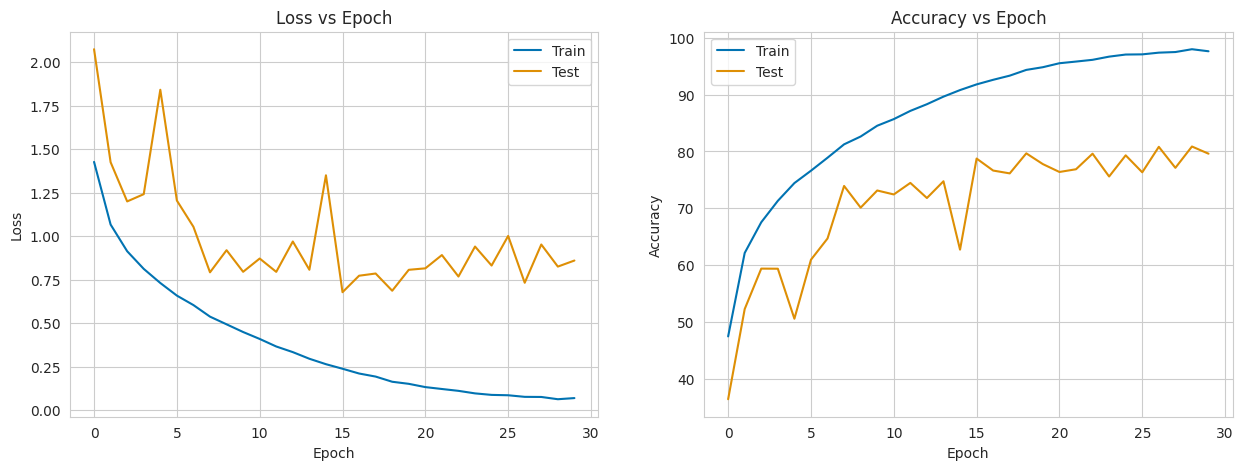

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.lineplot(ax=axes[0], x=range(EPOCHS), y=basic_train_losses, label="Train")
sns.lineplot(ax=axes[0], x=range(EPOCHS), y=basic_test_losses, label="Test")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].set_title("Loss vs Epoch")

sns.lineplot(ax=axes[1], x=range(EPOCHS), y=basic_train_accuracies, label="Train")
sns.lineplot(ax=axes[1], x=range(EPOCHS), y=basic_test_accuracies, label="Test")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].set_title("Accuracy vs Epoch")
plt.savefig("basic_loss_accuracy_plot.png")
plt.show()

**Insights on Basic CNN loss and accuracy curve vs Epochs:**

**Training Loss** consistently decreases, which indicates that the model is learning and improving its predictions on the training data over time.

**Testing Loss** shows more variability, suggesting the model’s performance on new, unseen data is less stable and may require further tuning to improve consistency.

**Training Accuracy** shows a steady increase, nearly reaching a plateau, demonstrating the model's growing proficiency at correctly classifying the training data.

**Testing Accuracy** is increasing but with significant fluctuations, which could imply that the model's ability to generalize needs enhancement, possibly through techniques like regularization or  data augmentation.

**`Advanced CNN model Loss and Accuracy curve`**

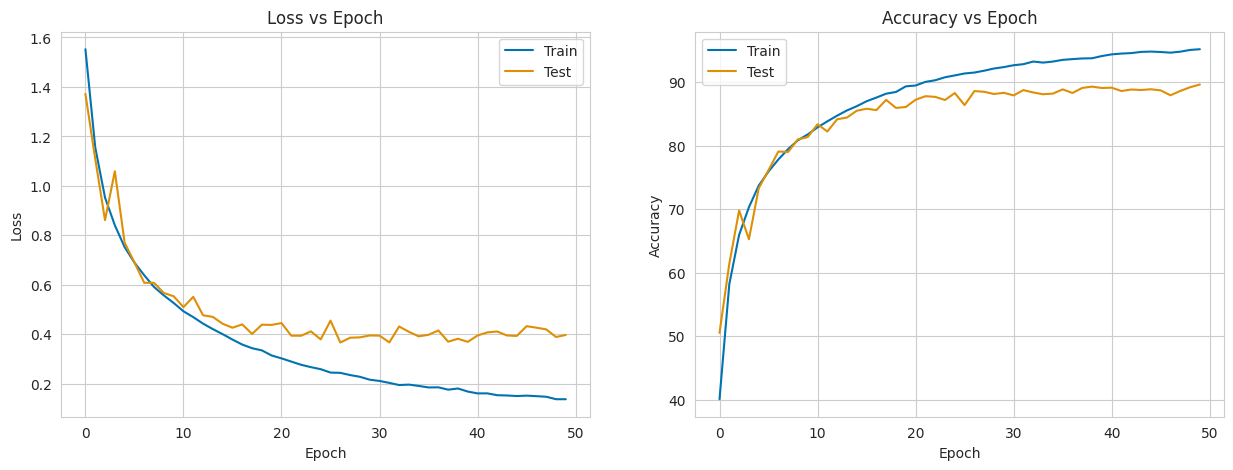

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.lineplot(ax=axes[0], x=range(EPOCHS), y=adv_train_losses, label="Train")
sns.lineplot(ax=axes[0], x=range(EPOCHS), y=adv_test_losses, label="Test")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].set_title("Loss vs Epoch")

sns.lineplot(ax=axes[1], x=range(EPOCHS), y=adv_train_accuracies, label="Train")
sns.lineplot(ax=axes[1], x=range(EPOCHS), y=adv_test_accuracies, label="Test")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].set_title("Accuracy vs Epoch")
plt.savefig("loss_accuracy_plot.png")
plt.show()

Based on the graphs for loss and accuracy of an advanced model across training epochs:

**Loss vs Epoch Graph Insights:**
  - The model's loss drops quickly at first, which means it's rapidly learning from the training data.
  - As epochs go on, the decrease in loss slows down, showing the model is stabilizing and extracting most of the learnable patterns from the data.
  - The test loss closely follows the training loss but is slightly higher, a normal occurrence indicating the model is slightly less effective on new, unseen data but still performing well.

**Accuracy vs Epoch Graph Insights:**
  - Accuracy improves sharply early in training, suggesting the model is quickly finding patterns that help it classify images correctly.
  - Both training and testing accuracies plateau after the initial jump, with the model continuing to slowly improve its prediction ability over time.
  - The testing accuracy closely trails the training accuracy with a consistent but narrow gap, indicating the model is generalizing well to new data and not just memorizing the training set.

Overall, these graphs suggest a well-performing model that learns effectively and generalizes well to new data without overfitting.

# **7. Model Accuracy**


**ADVANCED MODEL ACCURACY**

The 'AdvancedArchModel' model is trained for 50 epochs achieved a maximum training accuracy of 95.21% and a maximum test accuracy of 89.65%.



```
Dataset	 Loss	 Accuracy
Train	   0.137	 95.21%
Test	   0.387	 89.65%.
```

The model accuracy 89.64 and model loss is very minimal 0.397

```
{'model_name': 'AdvancedArchModel',
 'model_loss': 0.39756661653518677,
 'model_acc': 89.64968152866243}

```

In summary, the 'AdvancedArchModel' is performing well after 50 epochs of training, with a high accuracy rate and low loss, indicating a successful learning process and strong generalization to new, unseen data.



BASIC CNN MODEL ACCURACY:

The 'BasicrchModel' model is trained for 30 epochs achieved a maximum training accuracy of 97.61% and a maximum test accuracy of 79.61% which leads to overfitting and there may be discrepancies on the prediction thats why we have cretaed the adavanced cnn.



```
Dataset	 Loss	 Accuracy
Train	   0.06	 97.61%
Test	   0.86	 79.61%.
```

The model accuracy 79.60 and model loss is very minimal 0.860

```
{'model_name': 'BasicArchModel',
 'model_loss': 0.8601754903793335,
 'model_acc': 79.60788216560509}

```




**References:**

https://www.learnpytorch.io/02_pytorch_classification/

https://medium.com/@nagam808surya/cifar-10-image-classification-using-pytorch-90332041ba1f